## Hur bra är klustringen?

Den här anteckningsboken baseras också på Livsmedelsverkets Livsmedelsdatabas. Verkets klassificering i huvudgrupper kontrasteras mot klustring av livsmedel baserat på näringsvärde.


In [6]:
import sqlite3
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
debug = True

Börja med att läsa in allt från databasen. 

Allt ligger i variabeln dataset som är en numpy-array. Kolumn 0 är livsmedelsnamnet, 1 är livsmedelsnumret.

In [3]:
conn = sqlite3.connect('livs.db')
conn.row_factory = sqlite3.Row
curs = conn.cursor()

result = []
for row in curs.execute('select * from livs'):
    result.append(row)

conn.close()

dataset = np.array(result)
if debug:
    print (dataset[:5,:5])

[['Talg nöt' '1' 656.3 2746.0 0.0]
 ['Späck gris' '2' 763.0 3192.6 0.0]
 ['Ister gris' '3' 884.3 3700.0 0.0]
 ['Kokosfett' '4' 884.3 3700.0 0.0]
 ['Matfettsblandning havssaltat fett 80% berikad typ Bregott' '5' 711.5
  2977.0 0.5]]


Låt oss gå direkt på klustringen.

Det finns över 50 näringsvärden i databasen. De här tror jag ger en bra bild av rymden av livsmedel. 
```
[2 'Energi_kcal' 'REAL' 0 None 0]
[4 'Kolhydrater_g' 'REAL' 0 None 0]
[5 'Fett_g' 'REAL' 0 None 0]
[6 'Protein_g' 'REAL' 0 None 0]
[7 'Fibrer_g' 'REAL' 0 None 0]
[8 'Vatten_g' 'REAL' 0 None 0]
[9 'Alkohol_g' 'REAL' 0 None 0]
[10 'Aska_g' 'REAL' 0 None 0]
[42 'Vitamin_C_mg' 'REAL' 0 None 0]
[50 'Jarn_mg' 'REAL' 0 None 0]
```

Men kanske behövs inte alla dessa för att få en bra klassificering.

In [177]:
#Här är det urval som används nu
relevant_columns = [2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57]

#Kandidater [ 2,  4,  5,  6,  7,  8,  9, 10, 42, 50]

#Här är alla möjliga dimensioner. En del försvinner eftersom de 
#har värden som saknas för vissa livsmedel
#[ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57]

Det går förstås att välja en massa olika klustringsalgoritmer. Vi har valt k-means. Det finns också en hel del parametrar att välja. <http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [178]:
columns = dataset[:,relevant_columns] #Tar man bort ':,' blir det alltså ett urval rader
print(columns)

[[656.3 0.0 71.0 ..., 0.03 1.0 '0.1']
 [763.0 0.0 85.0 ..., 0.03 5.0 '0.4']
 [884.3 0.0 100.0 ..., 0.01 7.0 '0.1']
 ..., 
 [40.6 7.6 0.5 ..., 0.1 0.0 '0.05']
 [372.6 72.6 3.55 ..., 20.25 3.5 '1.05']
 [313.7 57.5 4.8 ..., 1.8 2.0 '0.6']]


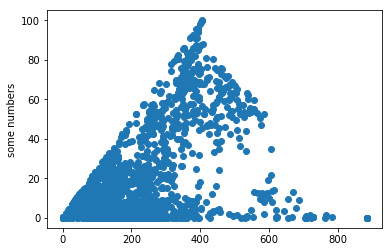

In [179]:
plt.scatter(columns[:,0],columns[:,1])
plt.ylabel('some numbers')
plt.show()

In [180]:
 def cluster(dataset):
    kmeans = KMeans(n_clusters=numClusters, verbose=0, n_init=100)
    kmeans.fit(dataset)

    centroids = kmeans.cluster_centers_
    clusters = kmeans.labels_
    
    #Utskriften kommer ju inte här, utan efter funktionsanropet
    if debug:
        print (centroids)
        print (clusters)

    return clusters, centroids

In [181]:
#Livsmedelsdatabasen innehåller över 100 huvudgrupper. Det hade varit bra att ha något 
#färre grupper på översta nivån. Högst 50. Eller kanske bara 10, för att komma ner i något som
#skulle kunna motsvara "frukt, grönsaker, fisk, kött, nötter" etc.
numClusters = 30

In [189]:
clusters, centroids = cluster(columns)

[[  4.31582160e+02   5.00246948e+01   2.28676995e+01 ...,   3.10093897e-01
    2.67211268e+00   6.25539906e-01]
 [  1.28100000e+02   5.00000000e+00   3.00000000e+00 ...,   6.00000000e+01
    0.00000000e+00   1.80000000e+00]
 [  1.29400000e+02   1.80000000e+00   3.70000000e+00 ...,   1.90000000e-01
    5.00000000e+01   3.40000000e+00]
 ..., 
 [  3.48700000e+02   2.66000000e+01   1.16000000e+01 ...,   9.50000000e-02
    2.00000000e+00   3.73500000e+00]
 [  2.96761290e+02   1.06164516e+01   1.89690323e+01 ...,   1.58612903e+00
    6.80322581e+00   2.88419355e+00]
 [  4.18242857e+02   5.10610204e+01   1.68820408e+01 ...,   4.46224490e-01
    1.59678571e+01   2.27163265e+00]]
[ 0  0  0 ..., 20  8 17]


Clusters är en array som är lika lång som antalet rader i dataset:

In [190]:
print(clusters, "Antal värden:", len(clusters))

[ 0  0  0 ..., 20  8 17] Antal värden: 2088


Beroende på hur man väljer parametrarna vid klustringen kan man få liten eller stor variation i hur många som hamnar i de olika klustren.

Här är en tabell med fördelningen, och med några enkla statistiska mått.

In [191]:
unique, counts = np.unique(clusters, return_counts=True) #https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
cluster_distribution = np.array(list(zip(unique, counts)))
print(cluster_distribution)
print("Medelvärde:", np.mean(cluster_distribution.T[1]))
print("Median:", np.median(cluster_distribution.T[1]))
print("Standardavvikelse:",np.std(cluster_distribution.T[1]))

[[  0 213]
 [  1   1]
 [  2   1]
 [  3   3]
 [  4   3]
 [  5 488]
 [  6   2]
 [  7   8]
 [  8   5]
 [  9   1]
 [ 10   1]
 [ 11   1]
 [ 12   5]
 [ 13   3]
 [ 14   9]
 [ 15 344]
 [ 16  38]
 [ 17 194]
 [ 18   1]
 [ 19   2]
 [ 20 528]
 [ 21  56]
 [ 22   4]
 [ 23   3]
 [ 24  12]
 [ 25   1]
 [ 26  30]
 [ 27   2]
 [ 28  31]
 [ 29  98]]
Medelvärde: 69.6
Median: 4.5
Standardavvikelse: 140.166472453


Ett första mått skulle kunna vara hur hur blandade ens kluster är, alltså hur många huvudgrupper de innehåller livsmedel från.

In [192]:
valt_kluster = 0

Eftersom det är så många livsmedel i varje kluster är det lättare att visa dem som en fördelning:

In [193]:
a=dataset[np.where(clusters==valt_kluster)][:,[0,60]]
unique, counts = np.unique(a.T[1], return_counts=True) #https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
huvudgrupp_distribution = np.array(list(zip(unique, counts)))

order=np.argsort(huvudgrupp_distribution.T[1].astype(int))
order = np.flipud(order)
#print (order)
huvudgrupp_distribution = huvudgrupp_distribution[order]
print(huvudgrupp_distribution, "\n", len(huvudgrupp_distribution))

[['Bullar kakor tårtor mm' '68']
 ['Olja' '14']
 ['Mjöl stärkelse kli' '13']
 ['Ris risnudlar' '11']
 ['Godis ej choklad' '11']
 ['Efterrätter' '10']
 ['Godis som innehåller choklad' '9']
 ['Sås dressing majonnäs' '8']
 ['Pasta' '8']
 ['Mjukt bröd' '7']
 ['Glass' '6']
 ['Chips popcorn o dyl' '5']
 ['Socker sirap honung' '5']
 ['Flingor - frukostflingor' '4']
 ['Övrigt fett (ister, talg, kokosfett)' '4']
 ['Söta soppor kräm o efterrättssås' '4']
 ['Grädde creme fraiche' '3']
 ['Majonnässallad röror' '2']
 ['Flytande matfettsblandning' '2']
 ['Matgryn' '2']
 ['Deg och gräddade skal och bottnar' '2']
 ['Gelatin agar agar' '2']
 ['Färskost o kvarg' '2']
 ['Choklad' '1']
 ['Sylt marmelad gelé äppelmos o dyl' '1']
 ['Sockerfritt godis' '1']
 ['Fågel' '1']
 ['Frukt o nötblandningar bars' '1']
 ['Likör' '1']
 ['Pannkakor, våfflor, crêpes' '1']
 ['Nötter frön' '1']
 ['Hårt bröd' '1']
 ['Sötningsmedel' '1']
 ['Kost- o näringspreparat' '1']] 
 34


cluster_distribution innehåller alla klustren och antal livsmedel. Vi vill göra om det så att vi får alla klustren och antal huvudgrupper i stället.

In [194]:
print (cluster_distribution[:,0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [195]:
cluster_profile = np.array([])
for row in cluster_distribution[:,0]:
    a=dataset[np.where(clusters==row)][:,[0,60]]
    unique, counts = np.unique(a.T[1], return_counts=True) #https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
    huvudgrupp_distribution = np.array(list(zip(unique, counts)))

    order=np.argsort(huvudgrupp_distribution.T[1].astype(int))
    order = np.flipud(order)
    #print (order)
    huvudgrupp_distribution = huvudgrupp_distribution[order]
    cluster_profile=np.append(cluster_profile,len(huvudgrupp_distribution))
    #print(len(huvudgrupp_distribution))

print(cluster_profile, np.mean(cluster_profile))
    

[ 34.   1.   1.   2.   1.  56.   1.   2.   4.   1.   1.   1.   1.   2.   6.
  35.  14.  34.   1.   2.  68.   9.   2.   1.   6.   1.  12.   2.   9.  25.] 11.1666666667


Klusterprofilen cluster_profile blir hur många huvudgrupper vi får i varje kluster, och så för alla kluster. 

När man klustrar med många näringsvärden verkar det bli mer spridning på antalet huvudgrupper i klustren, vilket kanske inte är det man vill ha...